In [1]:
# ASSIGNMENT #3:

# Mushroom Edibility Using Trees
# Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). 
# Use the mushrooms.csv file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter("ignore")

# Load the data from the file Mushrooms.csv.
df = pd.read_csv("mushrooms.csv")
print(df.head())
#print(df.isnull().sum()) 
# No null values, no need for data wrangling for null values


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [2]:
# All columns except ID and class in hours are descriptive features
descriptive_features = df.iloc[:,1:]
print(descriptive_features)
target_feature = df.iloc[:,:1]
target_feature

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

,class
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [25]:
col = descriptive_features.columns
col

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
# Changing each descriptive feature in to numeric values
# cap-shape
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('b',0)
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('c',1)
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('x',2)
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('f',3)
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('k',4)
descriptive_features["cap-shape"] = descriptive_features["cap-shape"].replace('s',5)

#cap-surface
descriptive_features["cap-surface"] = descriptive_features["cap-surface"].replace('f',0)
descriptive_features["cap-surface"] = descriptive_features["cap-surface"].replace('g',1)
descriptive_features["cap-surface"] = descriptive_features["cap-surface"].replace('y',2)
descriptive_features["cap-surface"] = descriptive_features["cap-surface"].replace('s',3)

#cap-color
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('n',0)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('b',1)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('c',2)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('g',3)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('r',4)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('p',5)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('u',6)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('e',7)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('w',8)
descriptive_features["cap-color"] = descriptive_features["cap-color"].replace('y',9)

#bruises
descriptive_features["bruises"] = descriptive_features["bruises"].replace('t',0)
descriptive_features["bruises"] = descriptive_features["bruises"].replace('f',1)

#odor

descriptive_features["odor"] = descriptive_features["odor"].replace('a',0)
descriptive_features["odor"] = descriptive_features["odor"].replace('l',1)
descriptive_features["odor"] = descriptive_features["odor"].replace('c',2)
descriptive_features["odor"] = descriptive_features["odor"].replace('y',3)
descriptive_features["odor"] = descriptive_features["odor"].replace('f',4)
descriptive_features["odor"] = descriptive_features["odor"].replace('m',5)
descriptive_features["odor"] = descriptive_features["odor"].replace('n',6)
descriptive_features["odor"] = descriptive_features["odor"].replace('p',7)
descriptive_features["odor"] = descriptive_features["odor"].replace('s',8)

#gill-attachment
descriptive_features["gill-attachment"] = descriptive_features["gill-attachment"].replace('a',0)
descriptive_features["gill-attachment"] = descriptive_features["gill-attachment"].replace('d',1)
descriptive_features["gill-attachment"] = descriptive_features["gill-attachment"].replace('f',2)
descriptive_features["gill-attachment"] = descriptive_features["gill-attachment"].replace('n',3)

#gill-spacing
descriptive_features["gill-spacing"] = descriptive_features["gill-spacing"].replace('c',0)
descriptive_features["gill-spacing"] = descriptive_features["gill-spacing"].replace('w',1)
descriptive_features["gill-spacing"] = descriptive_features["gill-spacing"].replace('d',2)

#gill-size
descriptive_features["gill-size"] = descriptive_features["gill-size"].replace('b',0)
descriptive_features["gill-size"] = descriptive_features["gill-size"].replace('n',1)

#gill-color

descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('k',0)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('n',1)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('b',2)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('h',3)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('g',4)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('r',5)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('o',6)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('p',7)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('u',8)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('e',9)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('w',10)
descriptive_features["gill-color"] = descriptive_features["gill-color"].replace('y',11)

#stalk-shape

descriptive_features["stalk-shape"] = descriptive_features["stalk-shape"].replace('e',0)
descriptive_features["stalk-shape"] = descriptive_features["stalk-shape"].replace('t',1)

#stalk-root
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('b',0)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('c',1)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('u',2)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('e',3)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('z',4)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('r',5)
descriptive_features["stalk-root"] = descriptive_features["stalk-root"].replace('?',6)

#stalk-surface-above-ring

descriptive_features["stalk-surface-above-ring"] = descriptive_features["stalk-surface-above-ring"].replace('f',0)
descriptive_features["stalk-surface-above-ring"] = descriptive_features["stalk-surface-above-ring"].replace('y',1)
descriptive_features["stalk-surface-above-ring"] = descriptive_features["stalk-surface-above-ring"].replace('k',2)
descriptive_features["stalk-surface-above-ring"] = descriptive_features["stalk-surface-above-ring"].replace('s',3)

#stalk-surface-below-ring

descriptive_features["stalk-surface-below-ring"] = descriptive_features["stalk-surface-below-ring"].replace('f',0)
descriptive_features["stalk-surface-below-ring"] = descriptive_features["stalk-surface-below-ring"].replace('y',1)
descriptive_features["stalk-surface-below-ring"] = descriptive_features["stalk-surface-below-ring"].replace('k',2)
descriptive_features["stalk-surface-below-ring"] = descriptive_features["stalk-surface-below-ring"].replace('s',3)

#stalk-color-above-ring

descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('n',0)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('b',1)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('c',2)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('g',3)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('o',4)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('p',5)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('e',6)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('w',7)
descriptive_features["stalk-color-above-ring"] = descriptive_features["stalk-color-above-ring"].replace('y',8)

#stalk-color-below-ring

descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('n',0)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('b',1)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('c',2)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('g',3)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('o',4)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('p',5)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('e',6)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('w',7)
descriptive_features["stalk-color-below-ring"] = descriptive_features["stalk-color-below-ring"].replace('y',8)


#veil-type
descriptive_features["veil-type"] = descriptive_features["veil-type"].replace('p',0)
descriptive_features["veil-type"] = descriptive_features["veil-type"].replace('u',1)

#veil-color
descriptive_features["veil-color"] = descriptive_features["veil-color"].replace('n',0)
descriptive_features["veil-color"] = descriptive_features["veil-color"].replace('o',1)
descriptive_features["veil-color"] = descriptive_features["veil-color"].replace('w',2)
descriptive_features["veil-color"] = descriptive_features["veil-color"].replace('y',3)

#ring-number
descriptive_features["ring-number"] = descriptive_features["ring-number"].replace('n',0)
descriptive_features["ring-number"] = descriptive_features["ring-number"].replace('o',1)
descriptive_features["ring-number"] = descriptive_features["ring-number"].replace('t',2)

#ring-type
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('c',0)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('e',1)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('f',2)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('l',3)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('n',4)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('p',5)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('s',6)
descriptive_features["ring-type"] = descriptive_features["ring-type"].replace('z',7)


#spore-print-color

descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('k',0)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('n',1)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('b',2)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('h',3)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('r',4)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('o',5)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('u',6)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('w',7)
descriptive_features["spore-print-color"] = descriptive_features["spore-print-color"].replace('y',8)


#population
descriptive_features["population"] = descriptive_features["population"].replace('a',0)
descriptive_features["population"] = descriptive_features["population"].replace('c',1)
descriptive_features["population"] = descriptive_features["population"].replace('n',2)
descriptive_features["population"] = descriptive_features["population"].replace('s',3)
descriptive_features["population"] = descriptive_features["population"].replace('v',4)
descriptive_features["population"] = descriptive_features["population"].replace('y',5)

#habitat
descriptive_features["habitat"] = descriptive_features["habitat"].replace('g',0)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('l',1)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('m',2)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('p',3)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('u',4)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('w',5)
descriptive_features["habitat"] = descriptive_features["habitat"].replace('d',6)

In [5]:
descriptive_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,2,0,1,0,0,...,3,7,7,0,2,1,5,0,3,4
1,2,3,9,0,0,2,0,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,3,8,0,1,2,0,0,1,0,...,3,7,7,0,2,1,5,1,2,2
3,2,2,8,0,7,2,0,1,1,0,...,3,7,7,0,2,1,5,0,3,4
4,2,3,3,1,6,2,1,0,0,1,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,5,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,5,2,4,1
8121,3,3,0,1,6,0,0,0,1,0,...,3,4,4,0,1,1,5,2,1,1
8122,4,2,0,1,3,2,0,1,2,1,...,2,7,7,0,2,1,1,7,4,1


In [6]:
for col in descriptive_features:
    print(descriptive_features[col].unique())

[2 0 5 3 4 1]
[3 2 0 1]
[0 9 8 3 7 5 1 6 2 4]
[0 1]
[7 0 1 6 4 2 3 8 5]
[2 0]
[0 1]
[1 0]
[ 0  1  4  7 10  3  8  9  2  5 11  6]
[0 1]
[3 1 0 5 6]
[3 0 2 1]
[3 0 1 2]
[7 3 5 0 1 6 4 2 8]
[7 5 3 1 0 6 8 4 2]
[0]
[2 0 1 3]
[1 2 0]
[5 1 3 2 4]
[0 1 6 3 7 4 5 8 2]
[3 2 0 4 5 1]
[4 0 2 6 3 5 1]


In [7]:
# Changing Target feature in to numeric data. Poisionous = 1 ; Edible =0
target_feature= target_feature.replace('e',0)
target_feature= target_feature.replace('p',1)
#target_feature

In [8]:
# Partition the dataset:
# 	•	random_state = 42 (1)
# 	•	Partitions 70/30 (1)
# 	•	Make sure to stratify! (1)
# 	•	max_depth = 6
# 	•	Use Entropy



# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 42,stratify=target_feature)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5686, 22), (5686, 1), (2438, 22), (2438, 1))

In [9]:
# Plot the classification tree Use 
# 	•	max_depth = 6
# 	•	Use Entropy (4)

# Training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_train)
y_pred_en   


array([0, 0, 1, ..., 0, 0, 1])

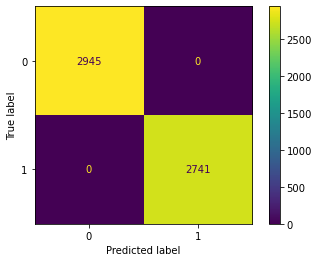

None


In [10]:
plot_confusion_matrix(clf_en, X_train, y_pred_en)  
print(plt.show())

In [11]:
# What was the accuracy on the training partition? (2)
# What was the accuracy on the Testing partition? (2)

# Accuracy of Training set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))

y_pred_en_test = clf_en.predict(X_test)
# Accuracy of Testing set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_test)))

Model accuracy score with criterion entropy: 1.0000
Model accuracy score with criterion entropy: 1.0000


[Text(0.4642857142857143, 0.9285714285714286, 'X[19] <= 2.5\nentropy = 0.999\nsamples = 5686\nvalue = [2945, 2741]'),
 Text(0.21428571428571427, 0.7857142857142857, 'X[7] <= 0.5\nentropy = 0.511\nsamples = 2711\nvalue = [2403, 308]'),
 Text(0.14285714285714285, 0.6428571428571429, 'entropy = 0.0\nsamples = 2297\nvalue = [2297, 0]'),
 Text(0.2857142857142857, 0.6428571428571429, 'X[4] <= 6.5\nentropy = 0.821\nsamples = 414\nvalue = [106, 308]'),
 Text(0.21428571428571427, 0.5, 'X[10] <= 1.5\nentropy = 0.989\nsamples = 242\nvalue = [106, 136]'),
 Text(0.14285714285714285, 0.35714285714285715, 'X[4] <= 1.5\nentropy = 0.749\nsamples = 173\nvalue = [37, 136]'),
 Text(0.07142857142857142, 0.21428571428571427, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.21428571428571427, 0.21428571428571427, 'entropy = 0.0\nsamples = 136\nvalue = [0, 136]'),
 Text(0.2857142857142857, 0.35714285714285715, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.35714285714285715, 0.5, 'entropy = 

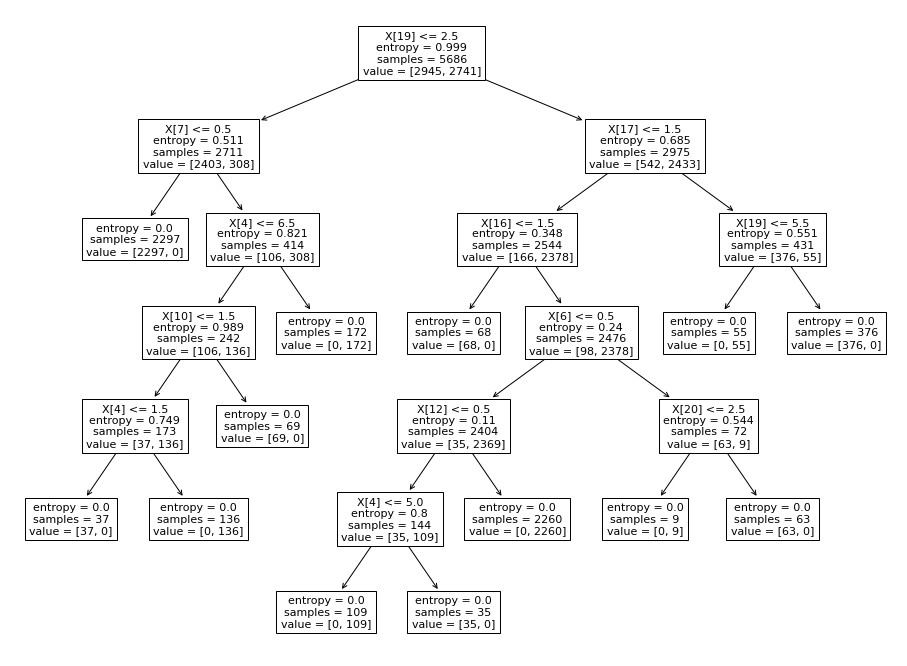

In [12]:
# Show the classification tree. (4)
plt.figure(figsize=(16,12))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [34]:
#List the top three most important features in your decision tree for determining toxicity. (6)

feat_importance = clf_en.tree_.compute_feature_importances(normalize=True)
feat_importance
# initialize N 
N = 3
  
# Indices of 3 largest elements in list
res = sorted(range(len(feat_importance)), key = lambda sub: feat_importance[sub])[-N:]
# printing result
print("Indices list of max 3 elements is : " ,res)
#print(len(res))
# 3 most important features are 
i =0

for i in range(len(res)):
    print('important feature',i+1, ':',col[res[i]])


Indices list of max 3 elements is :  [17, 7, 19]
important feature 1 : ring-number
important feature 2 : gill-size
important feature 3 : spore-print-color


In [ ]:
# Classify the following mushroom (6):
# Getting mapping of each descriptive feature
# 	•	cap-shape: x  - 2
# 	•	cap-surface: s 3
# 	•	cap-color: n 0
# 	•	bruises: t 0 
# 	•	odor: y 3
# 	•	gill-attachment: f 2
# 	•	gill-spacing: c 0 
# 	•	gill-size: n 1
# 	•	gill-color: k 0 
# 	•	stalk-shape: e 0
# 	•	stalk-root: e 3
# 	•	stalk-surface-above-ring: s 3
# 	•	stalk-surface-below-ring: s 3 
# 	•	stalk-color-above-ring: w 7
# 	•	stalk-color-below-ring: w 7 
# 	•	veil-type: p 0 
# 	•	veil-color: w 2
# 	•	ring-number: o 1
# 	•	ring-type: p 5
# 	•	spore-print-color: r 4
# 	•	population: s 3
# 	•	habitat: u 4



'habitat_w'

In [42]:
# Changing given values of different features to the mapping described above.
mushroom_features = [[2,3,0,0,3,2,0,1,0,0,3,3,3,7,7,0,2,1,5,4,3,4]]
mushroom_class_prediction = clf_en.predict(mushroom_features)
if mushroom_class_prediction[0] == 0:
    print('Given mushroom is Edible') 
elif mushroom_class_prediction[0] == 1:
    print('Given mushroom is Poisonous') 

given mushroom is Poisonous
